[Pyspark Tutorial](https://www.guru99.com/pyspark-tutorial.html)

[Python Pandas Snippets](https://gist.github.com/bsweger/e5817488d161f37dcbd2)

[Python Data Manipulation techniques](https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/)

[Databricks Python for big data: Koalas](https://databricks.com/blog/2020/03/31/10-minutes-from-pandas-to-koalas-on-apache-spark.html)

[Python RegEx: re.match(), re.search(), re.findall() with Example](https://www.guru99.com/python-regular-expressions-complete-tutorial.html)

[Spark – Working with collect_list() and collect_set() functions](https://sparkbyexamples.com/spark/spark-collect-list-and-collect-set-functions/)

[Pyspark Basics](https://towardsdatascience.com/pyspark-and-sparksql-basics-6cb4bf967e53)

[Introduction to apply, applymap and map](https://towardsdatascience.com/introduction-to-pandas-apply-applymap-and-map-5d3e044e93ff)

#### This is a notbook to practice pyspark and to apply pyspark code to solve problems.

- The first part of this notebook contains the equivelent python code to achieve the same solution as you would in pyspark.
- the python code solutions are provided using pandas, which is a python data manipulation library.

- Challenge 1 and 2 does not include the python equivelent.

In [1]:
#import python libs:
import pandas as pd
import numpy as np
import datetime
from requests import get
import os
from os import path, getcwd, makedirs, listdir
from io import BytesIO
from zipfile import ZipFile
import glob

In [ ]:
#download findspark if needed to run the cell below:
!pip install findspark #turn off vpn if error occurs

In [2]:
#find spark:
import findspark #lib to find where spark is
findspark.init('C:/spark')#path to spark

#---^ sometimes this is necessary in order to import pyspark

In [ ]:
#import pyspark libs:
from pyspark.sql import SparkSession

## Download data:

#### Pandas:

In [ ]:
os.getcwd()

In [ ]:
#download data from url: TURN OFF VPN

#create folder:
folder_data = 'data'

if not os.path.exists(folder_data): #downloaded files will be stored in folder 'data'
    os.makedirs(folder_data)
else:
    print('Folder already exists')
        
#loop through files (from url) starting at month 1 to 3: This will pull three files
for month in range(1, 4):
    month_string = str(month)
    month_leading_zero = month_string.zfill(2)
    
    #scrape URL:                                                      +01, 02, 03...eg:201801-fordgobike-tripdata.csv.zip
    bike_data_url = 'https://s3.amazonaws.com/fordgobike-data/2018' + month_leading_zero + '-fordgobike-tripdata.csv.zip'
    response = get(bike_data_url)

    # code below opens zip file; BytesIO returns a view of the contents;
    unzipped_file = ZipFile(BytesIO(response.content))

    # place extracted zip files into data folder
    unzipped_file.extractall(folder_data)

In [3]:
#import data:

df = pd.concat(map(pd.read_csv, glob.glob('data\\*.csv'))) 
#glob == used to retrieve files/pathnames matching a specified pattern

In [4]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,75284,2018-01-31 22:52:35.2390,2018-02-01 19:47:19.8240,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422,2018-01-31 16:13:34.3510,2018-02-01 15:57:17.3100,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No
2,71576,2018-01-31 14:23:55.8890,2018-02-01 10:16:52.1160,304,Jackson St at 5th St,37.348759,-121.894798,296,5th St at Virginia St,37.325998,-121.877120,3039,Customer,1996.0,Male,No
3,61076,2018-01-31 14:53:23.5620,2018-02-01 07:51:20.5000,75,Market St at Franklin St,37.773793,-122.421239,47,4th St at Harrison St,37.780955,-122.399749,321,Customer,NaN,NaN,No
4,39966,2018-01-31 19:52:24.6670,2018-02-01 06:58:31.0530,74,Laguna St at Hayes St,37.776435,-122.426244,19,Post St at Kearny St,37.788975,-122.403452,617,Subscriber,1991.0,Male,No


#### Pyspark:


In [ ]:
#create spark session:

In [ ]:
#import downloaded data into a pyspark dataframe:

## Check structure of dataset:

### How many rows and columns are there?

#### Pandas:

In [5]:
#number of rows and columns:
df.shape

(312902, 16)

#### Pyspark:

### What are the datatypes?

#### Pandas:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 312902 entries, 0 to 111381
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             312902 non-null  int64  
 1   start_time               312902 non-null  object 
 2   end_time                 312902 non-null  object 
 3   start_station_id         312902 non-null  int64  
 4   start_station_name       312902 non-null  object 
 5   start_station_latitude   312902 non-null  float64
 6   start_station_longitude  312902 non-null  float64
 7   end_station_id           312902 non-null  int64  
 8   end_station_name         312902 non-null  object 
 9   end_station_latitude     312902 non-null  float64
 10  end_station_longitude    312902 non-null  float64
 11  bike_id                  312902 non-null  int64  
 12  user_type                312902 non-null  object 
 13  member_birth_year        287936 non-null  float64
 14  memb

#### Pyspark:

### Print ot all column names:

#### Pandas:

In [7]:
#print all col names:
list(df.columns)

['duration_sec',
 'start_time',
 'end_time',
 'start_station_id',
 'start_station_name',
 'start_station_latitude',
 'start_station_longitude',
 'end_station_id',
 'end_station_name',
 'end_station_latitude',
 'end_station_longitude',
 'bike_id',
 'user_type',
 'member_birth_year',
 'member_gender',
 'bike_share_for_all_trip']

#### Pyspark:

## Transforming Data:

### Rename 2 columns:

#### Pandas: 

In [8]:
df.rename(columns = {'start_station_latitude': 'start_station_lat',
                     'end_station_latitude': 'end_station_lat'}, inplace = True)

#### Pyspark:

### Change Datatypes:
- change 'start_time' to datetime and clean up values to only include Y M D
- change duration_sec, longitude and latitude columns to float

#### Pandas:


In [9]:
#Before datetime convertion:
df.start_time.head(1)

0    2018-01-31 22:52:35.2390
Name: start_time, dtype: object

In [10]:
df['start_time'] = pd.to_datetime(df['start_time']).dt.normalize()

In [11]:
#after datetime convertion:
df.start_time.head(1)

0   2018-01-31
Name: start_time, dtype: datetime64[ns]

In [12]:
#to float:
cols = ['duration_sec',
        'start_station_lat', 
        'start_station_longitude',
        'end_station_lat', 
        'end_station_longitude']

for col in cols:
    df[col] = df[col].astype(float)

#### Pyspark:

### Remove all whitespaces:

#### Pandas:

In [13]:
#remove from entire df:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

#### Pyspark:

### Make all column names uppercase:

#### Pandas:

In [14]:
df.columns = df.columns.str.upper()

#OR list comprehension:
#df.columns = [x.upper() for x in df.columns]

In [15]:
#test
df.head(2)

,DURATION_SEC,START_TIME,END_TIME,START_STATION_ID,START_STATION_NAME,START_STATION_LAT,START_STATION_LONGITUDE,END_STATION_ID,END_STATION_NAME,END_STATION_LAT,END_STATION_LONGITUDE,BIKE_ID,USER_TYPE,MEMBER_BIRTH_YEAR,MEMBER_GENDER,BIKE_SHARE_FOR_ALL_TRIP
0,75284.0,2018-01-31,2018-02-01 19:47:19.8240,120,Mission Dolores Park,37.761420,-122.426435,285,Webster St at O'Farrell St,37.783521,-122.431158,2765,Subscriber,1986.0,Male,No
1,85422.0,2018-01-31,2018-02-01 15:57:17.3100,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2815,Customer,NaN,NaN,No


#### Pyspark:

### Remove unwanted columns:

#### Pandas:

In [16]:
list(df.columns)

['DURATION_SEC',
 'START_TIME',
 'END_TIME',
 'START_STATION_ID',
 'START_STATION_NAME',
 'START_STATION_LAT',
 'START_STATION_LONGITUDE',
 'END_STATION_ID',
 'END_STATION_NAME',
 'END_STATION_LAT',
 'END_STATION_LONGITUDE',
 'BIKE_ID',
 'USER_TYPE',
 'MEMBER_BIRTH_YEAR',
 'MEMBER_GENDER',
 'BIKE_SHARE_FOR_ALL_TRIP']

In [17]:
#select cols to keep:
df = df[['DURATION_SEC',
     'START_TIME',
     'END_TIME','BIKE_ID',
     'USER_TYPE',
     'MEMBER_BIRTH_YEAR',
     'MEMBER_GENDER']]

In [18]:
#test:
df.head(2)

,DURATION_SEC,START_TIME,END_TIME,BIKE_ID,USER_TYPE,MEMBER_BIRTH_YEAR,MEMBER_GENDER
0,75284.0,2018-01-31,2018-02-01 19:47:19.8240,2765,Subscriber,1986.0,Male
1,85422.0,2018-01-31,2018-02-01 15:57:17.3100,2815,Customer,NaN,NaN


#### Pyspark:

### Change columns back to lowercase:

#### Pandas:

In [19]:
df.columns = df.columns.str.lower()

#### Pyspark:

### Remove null values from member birth year:

#### Pandas:

In [20]:
import warnings
warnings.filterwarnings('ignore') #so that warnings are not printed

df.dropna(subset = ['member_birth_year'], inplace = True)

#### Pyspark:

### Create a new column member_age:

#### Pandas:


In [21]:
df['member_age'] = 2018 - df['member_birth_year'].astype(int)

In [22]:
#test:
df.head()

,duration_sec,start_time,end_time,bike_id,user_type,member_birth_year,member_gender,member_age
0,75284.0,2018-01-31,2018-02-01 19:47:19.8240,2765,Subscriber,1986.0,Male,32
2,71576.0,2018-01-31,2018-02-01 10:16:52.1160,3039,Customer,1996.0,Male,22
4,39966.0,2018-01-31,2018-02-01 06:58:31.0530,617,Subscriber,1991.0,Male,27
6,453.0,2018-01-31,2018-02-01 00:01:26.8050,3571,Subscriber,1988.0,Male,30
7,180.0,2018-01-31,2018-01-31 23:55:10.8070,1403,Subscriber,1980.0,Male,38


#### Pyspark:

### Create a new col age_group by grouping ages:

#### Pandas:

In [23]:
bins = [18, 25, 40, 60, 118] #18-25, 26-40, 41-60, 61-118
labels = ['young_adult', 'adult', 'middle_age', 'mature_adult']

df['age_groups'] = pd.cut(df['member_age'], bins = bins, labels = labels)

In [24]:
#test:
df.head()

,duration_sec,start_time,end_time,bike_id,user_type,member_birth_year,member_gender,member_age,age_groups
0,75284.0,2018-01-31,2018-02-01 19:47:19.8240,2765,Subscriber,1986.0,Male,32,adult
2,71576.0,2018-01-31,2018-02-01 10:16:52.1160,3039,Customer,1996.0,Male,22,young_adult
4,39966.0,2018-01-31,2018-02-01 06:58:31.0530,617,Subscriber,1991.0,Male,27,adult
6,453.0,2018-01-31,2018-02-01 00:01:26.8050,3571,Subscriber,1988.0,Male,30,adult
7,180.0,2018-01-31,2018-01-31 23:55:10.8070,1403,Subscriber,1980.0,Male,38,adult


#### Pyspark:

[Pyspark when, otherwise](https://sparkbyexamples.com/pyspark/pyspark-when-otherwise/)

[pyspark.sql.Column.between](https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.Column.between.html)

### Create a new day of the week column based on entries in the start_time col 

#### Pandas:

In [25]:
#extract weekday from start_time in df:
df['weekday'] = df['start_time'].dt.day_name()

In [26]:
#test:
df.weekday.value_counts()

Wednesday    52497
Tuesday      51812
Thursday     49901
Friday       47521
Monday       42441
Saturday     24707
Sunday       19057
Name: weekday, dtype: int64

#### Pyspark: 

[get weekday Pyspark](https://www.datasciencemadesimple.com/get-day-of-month-day-of-year-day-of-week-from-date-in-pyspark/)

In [ ]:
from pyspark.sql.functions import date_format


### Create a duration minutes col based on entries in the duration sec col:

#### Pandas:

In [27]:
df['dur_min'] = (df['duration_sec'] / 60).round(2) # round off to 2 decimal places

In [28]:
#test:
df.head()

,duration_sec,start_time,end_time,bike_id,user_type,member_birth_year,member_gender,member_age,age_groups,weekday,dur_min
0,75284.0,2018-01-31,2018-02-01 19:47:19.8240,2765,Subscriber,1986.0,Male,32,adult,Wednesday,1254.73
2,71576.0,2018-01-31,2018-02-01 10:16:52.1160,3039,Customer,1996.0,Male,22,young_adult,Wednesday,1192.93
4,39966.0,2018-01-31,2018-02-01 06:58:31.0530,617,Subscriber,1991.0,Male,27,adult,Wednesday,666.10
6,453.0,2018-01-31,2018-02-01 00:01:26.8050,3571,Subscriber,1988.0,Male,30,adult,Wednesday,7.55
7,180.0,2018-01-31,2018-01-31 23:55:10.8070,1403,Subscriber,1980.0,Male,38,adult,Wednesday,3.00


#### Pyspark:

### Looking into the data:

#### Pandas Find the max and min duration in minutes (return a single value for each):

In [89]:
#max:
df.dur_min.max()

1424.52

In [90]:
#min:
df.dur_min.min()

1.02

#### Pyspark Find the max and min duration in minutes (return a single value for each): Try another method besides .collect(), See [here](https://stackoverflow.com/a/61285268)

#### show the total hours spend riding for each weekday

#### Pandas:

In [78]:
(df.groupby('weekday')['dur_min'].sum()/60).round(2).rename_axis('Week Days').reset_index(name = 'dur_hrs')

#OR

#(df.groupby('weekday').agg({'dur_min':'sum'})/60).round(2)  #closer to pyspark syntax

,Week Days,dur_hrs
0,Friday,9472.61
1,Monday,8307.63
2,Saturday,6740.77
3,Sunday,4838.48
4,Thursday,9555.82
5,Tuesday,10094.62
6,Wednesday,10134.89


#### Pyspark:

#### On average, which age group spends more time riding in minutes?

#### Pandas:

In [36]:
#find average time spend riding in minutes by age group and sort results by highest to lowest:
(df.groupby('age_groups')['dur_min'].mean()).round(2).sort_values(ascending = False)

age_groups
young_adult     13.49
mature_adult    13.01
middle_age      12.65
adult           11.93
Name: dur_min, dtype: float64

#### Pyspark:

#### Create a new df that contains the total hours traveled for each bike(bike_id). Display top 10 records from highest to lowest.

#### Pandas:

In [72]:
df2 = pd.DataFrame((df.groupby('bike_id')['dur_min'].sum()/60).round(2).rename_axis('Bikes').reset_index(name = 'dur_hrs'))

In [74]:
#top 10:
df2.head(10).sort_values(by = 'dur_hrs', ascending = False)

,Bikes,dur_hrs
7,20,22.86
5,17,19.20
0,11,12.81
9,22,8.53
3,14,7.36
6,18,7.31
8,21,7.09
2,13,5.73
1,12,3.60
4,15,1.50


#### Pyspark:

#### Display the average time spent riding for each gender per age group:

#### Pandas:

In [79]:
pd.pivot_table(df, values='dur_min', index=['age_groups'], columns=['member_gender'], aggfunc=np.mean)
#np == numpy which is a numerical python library

member_gender,Female,Male,Other
age_groups,,,
young_adult,17.495940,12.032403,12.984340
adult,13.864426,11.157213,15.581798
middle_age,14.685812,12.041581,17.669430
mature_adult,15.978245,12.239596,17.522634


#### Pyspark:

### Filter:

#### The total number of times each age group went for a ride when users are a subscriber:

#### Pandas:

In [68]:
df[df.user_type == 'Subscriber'].groupby('age_groups')['bike_id'].count()

age_groups
young_adult      28564
adult           157738
middle_age       69390
mature_adult      7805
Name: bike_id, dtype: int64

#### Pyspark:

[Pyspark filter](https://www.datasciencemadesimple.com/subset-or-filter-data-with-multiple-conditions-in-pyspark/)

#### Display the max, min and total duration in minutes for each weekday:

#### Pandas:

In [76]:
#filter and group:
df[df['member_gender'] == 'Male'].groupby('weekday').agg(
    # Get max of the duration column for each group
    max_duration=('dur_min', max),
    # Get min of the duration column for each group
    min_duration=('dur_min', min),
    # Get sum of the duration column for each group
    total_duration=('dur_min', sum))

,max_duration,min_duration,total_duration
weekday,,,
Friday,1413.27,1.02,405035.49
Monday,1350.50,1.02,347203.32
Saturday,1274.08,1.03,256351.39
Sunday,1221.02,1.02,185325.91
Thursday,1415.47,1.02,408882.09
Tuesday,1328.67,1.02,428864.58
Wednesday,1403.22,1.02,434234.23


#### Pyspark:

## Challenge with Hockey Games Data:
### Steps:

- Load data

- There are many columns, only keep:

    "game_id", 
    
    'teamName,
    
    'BothTeamsList',
    
    "AwayTeamName",
    
    "HomeTeamName",
    
    'away_goals',
    
    'home_goals',
    
    "date_time_GMT"
    
    
- Remove whitespaces from values in df. 


#### Adding and Modifying columns:
1) Create a new column based on criteria and conditions of existing columns:

- create a 'winner' column based on 'home_goals' and 'away_goals'. The winner column should include the team name that won.

   ***Tips:***
    - use ```when()``` statement and conditional operators(e.g, ```<``` ```>```)
        
        
**A more chanllenging approach to create winner col:**
    
  - Try creating the new winner column with a user defined function(UDF), an [array](https://careerkarma.com/blog/python-array/) and a [lambda](https://www.analyticsvidhya.com/blog/2021/06/anonymous-or-lambda-functions-in-python-a-beginners-guide/)
  
    ***Tips:***
    - create the udf: 
      udf_name = **udf**(**lambda** x: conditions  if else, StringType())
    - apply UDF:
      df = df.something('new_col', udf_name(something('variable', 'variable', 'variable', 'variable')))
      
      
      
      
2) Create a new column 'game_title' using ```concat()``` and ```lit()``` OR ```concat_ws()```. The resulting values of the new column should be awayteam vs home team, for example ```Flyers VS Thrashers```


3) Create a new column named 'Home/Away Win' that indicates whether home team or away team won a game. This column should have the values 'home_win' or 'away_win' or "draw". 

4) - trim dataframe(There are duplicate records, find the column in which there are problematic dups)


#### GorupBy(), Filter and Aggregations:

1) How many times did an away team win a game?


2) how many games were played in total?


3) How many times total did the panthers win a game?


4) How many time in total did two teams play against each other?


5) Which venue hosted the most and least number of games?

6) Display how many times each team has a home win, an away win, and total games played in a single table. Are teams more likely to win games if they play away or home games?

7) Create a new dataset that holds "game_id", 'team_name as columns and create a new column that holds the total number of times each team has won a game.

In [166]:
#download data with pandas from github: TURN OFF VPN TO RUN THIS CODE
url = 'https://raw.githubusercontent.com/Khrystyne-T/Test_Projects/main/TEST%20projects/hockey_data_prepared.csv'
dfG = pd.read_csv(url)

In [167]:
dfG.head()

,game_id,season,type,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,home_rink_side_start,venue,...,blocked,startRinkSide,franchiseId,shortName,teamName,abbreviation,link,BothTeamsList,HomeTeamName,AwayTeamName
0,2016020045,20162017,R,2016-10-19T00:30:00Z,4,16,4,7,right,United Center,...,11.0,left,16,Philadelphia,Flyers,PHI,/api/v1/teams/4,"Blackhawks, Flyers",Blackhawks,Flyers
1,2016020045,20162017,R,2016-10-19T00:30:00Z,4,16,4,7,right,United Center,...,9.0,left,11,Chicago,Blackhawks,CHI,/api/v1/teams/16,"Blackhawks, Flyers",Blackhawks,Flyers
2,2016020246,20162017,R,2016-11-18T00:00:00Z,52,4,2,5,right,Wells Fargo Center,...,20.0,left,16,Philadelphia,Flyers,PHI,/api/v1/teams/4,"Jets, Flyers",Jets,Flyers
3,2016020246,20162017,R,2016-11-18T00:00:00Z,52,4,2,5,right,Wells Fargo Center,...,21.0,left,35,Winnipeg,Jets,WPG,/api/v1/teams/52,"Jets, Flyers",Jets,Flyers
4,2016020986,20162017,R,2017-03-10T00:30:00Z,4,10,2,4,right,Air Canada Centre,...,14.0,left,16,Philadelphia,Flyers,PHI,/api/v1/teams/4,"Maple Leafs, Flyers",Maple Leafs,Flyers


In [ ]:
dfG.teamName.value_counts()

**You don't need to download the data from the url into a pyspark df, you can convert the pd df to a pyspark df:**

[pandas to pyspark](https://stackoverflow.com/questions/52943627/convert-a-pandas-dataframe-to-a-pyspark-dataframe)


**OR:**

You can save the file locally and then import it into a pyspark df:

```dfG.to_csv('file_name.csv', index = False)```

### Challenge 2:

#### Create homeTeamName col and AwayTeam name col yourself:


1) create a new column from TeamName to include both team names in a single row for each record, you'll see that each game has two records that includes the team name for each game. (This is why there are duplicates in game_id)


2) split records in new col created in step 2 and create two sepeare columns for awayteamname and hometeamname

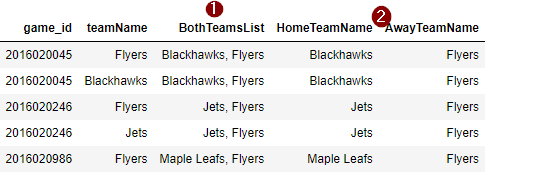


**This is the approach I have taken to create the away team and home team columns. If you find you can use another approach to achieve the same end result, go for it.**

In [164]:
#download unprepped file:

url = 'https://raw.githubusercontent.com/Khrystyne-T/Test_Projects/main/TEST%20projects/hockey_data.csv'
df = pd.read_csv(url)

In [165]:
df.head()

,game_id,season,type,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,home_rink_side_start,venue,...,faceOffWinPercentage,giveaways,takeaways,blocked,startRinkSide,franchiseId,shortName,teamName,abbreviation,link
0,2016020045,20162017,R,2016-10-19T00:30:00Z,4,16,4,7,right,United Center,...,50.9,12.0,9.0,11.0,left,16,Philadelphia,Flyers,PHI,/api/v1/teams/4
1,2016020045,20162017,R,2016-10-19T00:30:00Z,4,16,4,7,right,United Center,...,49.1,16.0,8.0,9.0,left,11,Chicago,Blackhawks,CHI,/api/v1/teams/16
2,2016020246,20162017,R,2016-11-18T00:00:00Z,52,4,2,5,right,Wells Fargo Center,...,55.6,11.0,10.0,20.0,left,16,Philadelphia,Flyers,PHI,/api/v1/teams/4
3,2016020246,20162017,R,2016-11-18T00:00:00Z,52,4,2,5,right,Wells Fargo Center,...,44.4,6.0,11.0,21.0,left,35,Winnipeg,Jets,WPG,/api/v1/teams/52
4,2016020986,20162017,R,2017-03-10T00:30:00Z,4,10,2,4,right,Air Canada Centre,...,57.6,12.0,5.0,14.0,left,16,Philadelphia,Flyers,PHI,/api/v1/teams/4
